In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
i

In [31]:
df = pd.read_csv('Admission Chance.csv')
df

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [32]:
df.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


<ipython-input-33-ef1103b117db>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GRE Score'], kde=True)
<ipython-input-33-ef1103b117db>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TOEFL Score'], kde=True)
<ipython-input-33-ef1103b117db>:11: UserWarning: 

`distplot` is a deprecated 

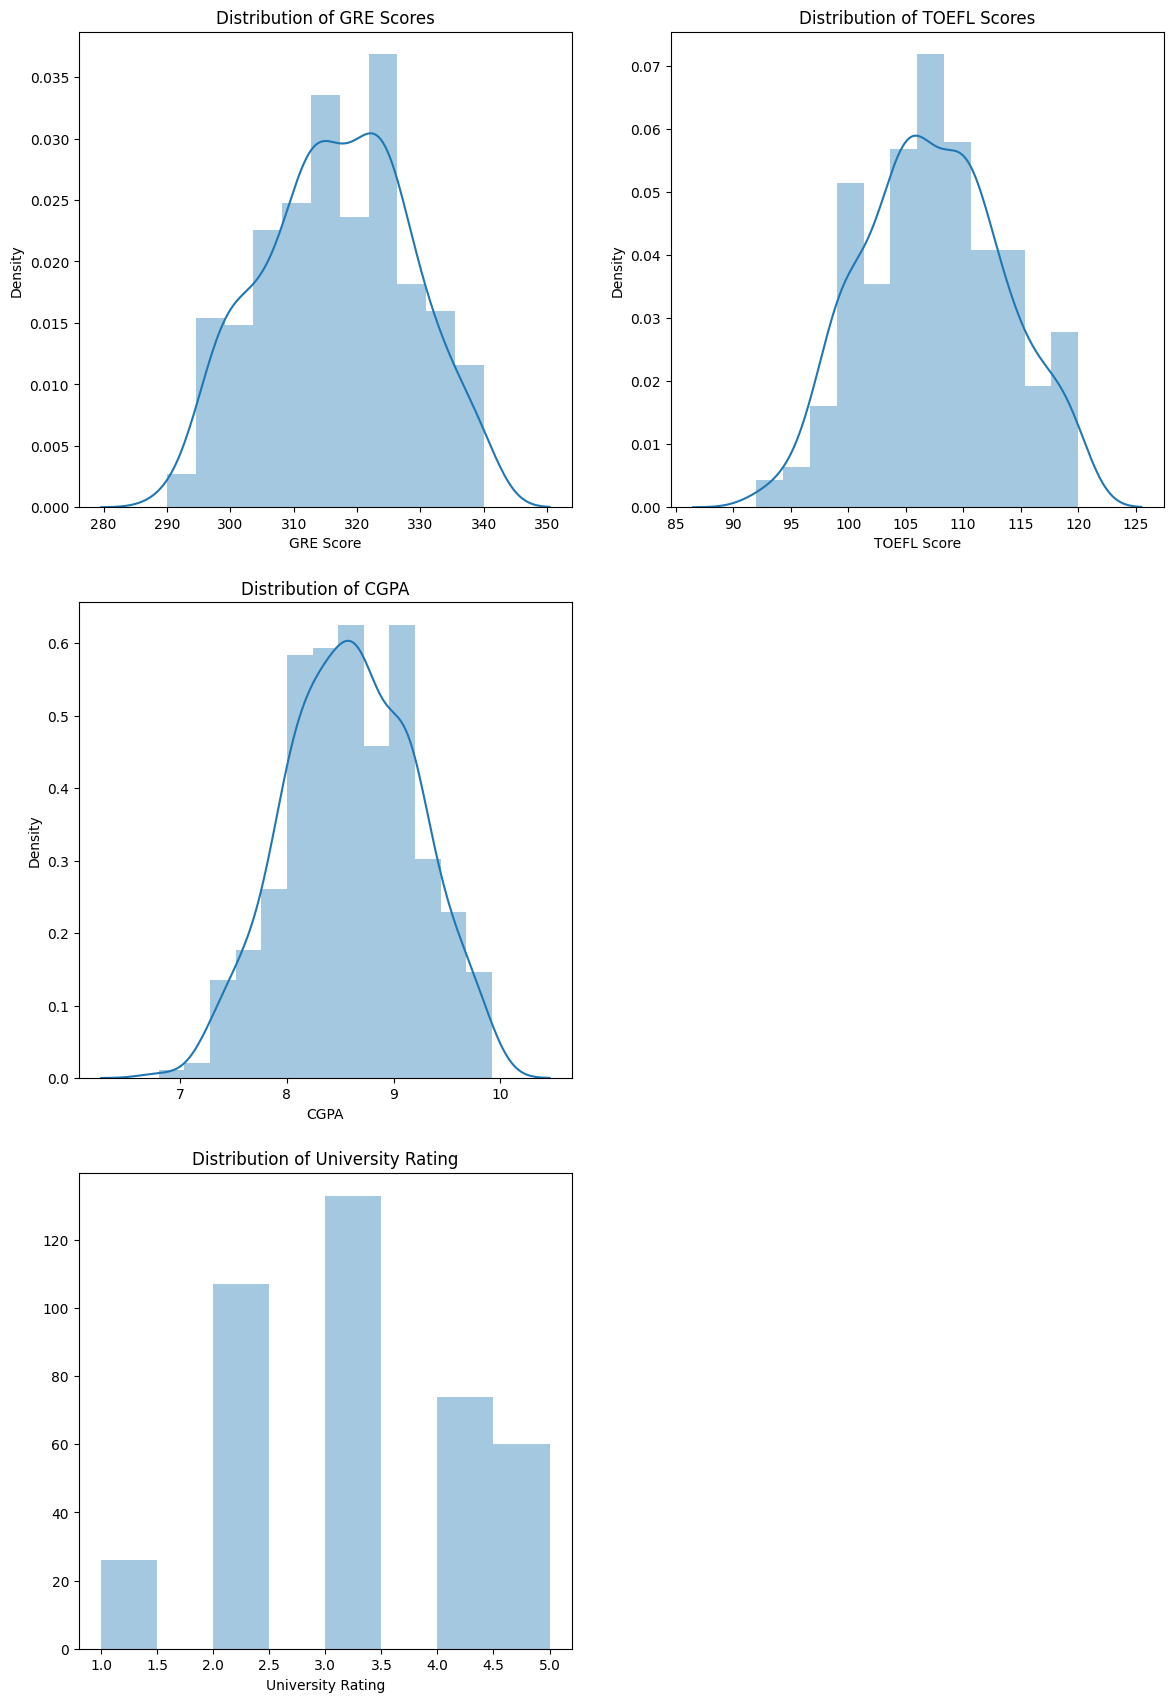

In [33]:
fig = plt.figure(figsize=(14, 21))
fig.add_subplot(321)
sns.distplot(df['GRE Score'], kde=True)
plt.title("Distribution of GRE Scores")

fig.add_subplot(322)
sns.distplot(df['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Scores")

fig.add_subplot(323)
sns.distplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")


fig.add_subplot(325)
sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")

plt.show()

In [34]:
from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler_fit=minmax_scaler.fit(df[['GRE Score', 'TOEFL Score']])
NormalizedGREScoreAndTOEFLScore = minmax_scaler_fit.transform(df[['GRE Score', 'TOEFL Score']])

PredictorColumns=list(df.columns)

PredictorColumns.remove('Chance of Admit ')
X=df[PredictorColumns].values
y=df['Chance of Admit '].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

AdmitData=pd.DataFrame(X_test, columns=PredictorColumns)
AdmitData['ChancesOfAdmit']=y_test

AdmitData.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChancesOfAdmit
0,333.0,308.0,106.0,3.0,3.5,2.5,8.21,1.0,0.75
1,112.0,321.0,109.0,4.0,4.0,4.0,8.68,1.0,0.69
2,353.0,303.0,100.0,2.0,3.0,3.5,8.06,1.0,0.64
3,206.0,295.0,99.0,2.0,2.5,3.0,7.65,0.0,0.57
4,57.0,316.0,102.0,3.0,2.0,3.0,7.40,0.0,0.64
